## 1 LeNet5
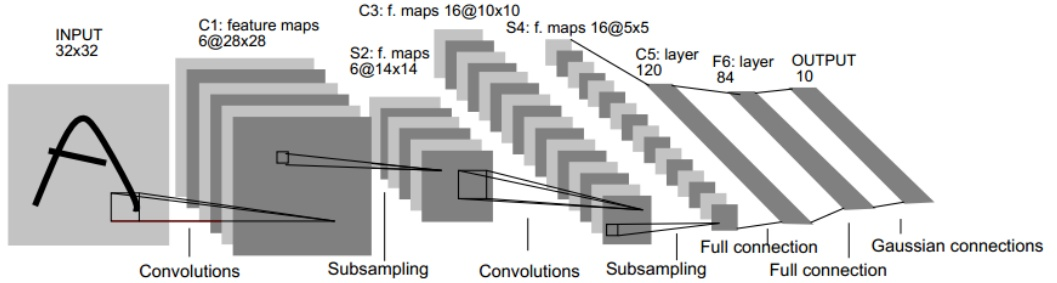

# 2 LeNet实现
## 2.1 导入包

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
torch.__version__

'0.4.1'

## 2.2 设置变量,导入数据

In [2]:
BATCH_SIZE=512 #大概需要2G的显存
EPOCHS=20 # 总共训练批次
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 让torch判断是否使用GPU

In [ ]:
def download_mnist_data(batch_size):
    # transform 函数式编程, 对数据的变换 train指定测试训练
    # 载入数据集，申明定义的数据变换
    # 定义train=True or false
    train_set = MNIST(r'E:\ai\ai_lab\ai_case\ai_data\pytorch\MNIST\data', 
                      train=True, 
                      transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]), 
                      download=False) 
    test_set = MNIST(r'E:\ai\ai_lab\ai_case\ai_data\pytorch\MNIST\data', 
                     train=False, 
                     transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]), 
                     download=False)
    # 加载数据,打乱数据
    ## DataLoader: 批量取多少图片
    train_data = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
    
    return train_data

In [1]:
'''LeNet in PyTorch.'''
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [2]:
mo_net = LeNet()
print(mo_net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
